In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/empreendimento.csv')

In [3]:
df.head(10)

,id_empreendimento,data_inicio,data_fim,finalidade,atividade,modalidade,produto,variedade,cesta_safra,zoneamento,unidade_medida,unidade_medida_previsao_producao,consorcio,cedula_mae,id_tipo_cultura
0,22507460333408,2018-08-29,NaN,custeio,pecuario(a),pesca,armacao para barco de pesca,manutencao/aquisicao,ano civil / ano de exploracao,NaN,unidade,unidade,valor invalido,0,NaN
1,12016565000053,2021-02-03,NaN,custeio,agricola,lavoura,sapoti,nao se aplica,irrigadas,NaN,hectare,tonelada,nao consorciado,0,1
2,12016560000043,2017-05-15,NaN,custeio,agricola,lavoura,salsa,nao se aplica,fruticultura / olericultura,NaN,hectare,tonelada,nao consorciado,0,4
3,12014580000013,2017-03-20,2020-04-03,custeio,agricola,lavoura,linho,nao se aplica,safra de verao (1ª safra),NaN,hectare,tonelada,nao consorciado,0,2
4,12014320000043,2017-03-20,NaN,custeio,agricola,lavoura,lichia (lechia),nao se aplica,fruticultura / olericultura,NaN,hectare,tonelada,nao consorciado,0,2
5,12013540000053,2021-02-03,NaN,custeio,agricola,lavoura,fava,nao se aplica,irrigadas,NaN,hectare,tonelada,nao consorciado,0,1
6,12017280213053,2021-02-05,NaN,custeio,agricola,lavoura,uva,mudas,irrigadas,NaN,hectare,unidade,nao consorciado,0,2
7,12015660255043,2017-03-20,NaN,custeio,agricola,lavoura,palmeira,real,fruticultura / olericultura,NaN,hectare,tonelada,nao consorciado,0,2
8,12016360000043,2017-10-20,NaN,custeio,agricola,lavoura,rabanete,nao se aplica,fruticultura / olericultura,NaN,hectare,tonelada,nao consorciado,0,1
9,12014960000053,2017-03-20,NaN,custeio,agricola,lavoura,maxixe,nao se aplica,irrigadas,NaN,hectare,tonelada,nao consorciado,0,4


In [4]:
df.describe()

,id_empreendimento
count,3.033000e+03
mean,1.426969e+13
std,4.342507e+12
min,0.000000e+00
25%,1.201014e+13
50%,1.201588e+13
75%,1.340740e+13
max,2.440676e+13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id_empreendimento                 3033 non-null   int64 
 1   data_inicio                       3033 non-null   object
 2   data_fim                          943 non-null    object
 3   finalidade                        2935 non-null   object
 4   atividade                         3032 non-null   object
 5   modalidade                        3033 non-null   object
 6   produto                           3033 non-null   object
 7   variedade                         3033 non-null   object
 8   cesta_safra                       3033 non-null   object
 9   zoneamento                        2211 non-null   object
 10  unidade_medida                    2991 non-null   object
 11  unidade_medida_previsao_producao  2984 non-null   object
 12  consorcio           

In [6]:
df.dtypes

,0
id_empreendimento,int64
data_inicio,object
data_fim,object
finalidade,object
atividade,object
modalidade,object
produto,object
variedade,object
cesta_safra,object
zoneamento,object


In [7]:
# Substitua valores não numéricos por NaN antes de converter para int
df['id_tipo_cultura'] = pd.to_numeric(df['id_tipo_cultura'], errors='coerce').astype('Int64')

print(df)

      id_empreendimento data_inicio    data_fim    finalidade    atividade  \
0        22507460333408  2018-08-29         NaN       custeio  pecuario(a)   
1        12016565000053  2021-02-03         NaN       custeio     agricola   
2        12016560000043  2017-05-15         NaN       custeio     agricola   
3        12014580000013  2017-03-20  2020-04-03       custeio     agricola   
4        12014320000043  2017-03-20         NaN       custeio     agricola   
...                 ...         ...         ...           ...          ...   
3028     23134020109002  1984-01-01  2020-02-29  investimento  pecuario(a)   
3029     13134020109002  1984-01-01  2020-02-29  investimento     agricola   
3030     13144900145408  2019-01-01         NaN  investimento     agricola   
3031     23144900145408  2021-03-25         NaN  investimento  pecuario(a)   
3032     13144860111002  1984-01-01         NaN  investimento     agricola   

                        modalidade                      produto

In [8]:
# Verificando se há valores faltantes
print(df.isnull().sum())

id_empreendimento                      0
data_inicio                            0
data_fim                            2090
finalidade                            98
atividade                              1
modalidade                             0
produto                                0
variedade                              0
cesta_safra                            0
zoneamento                           822
unidade_medida                        42
unidade_medida_previsao_producao      49
consorcio                              9
cedula_mae                            10
id_tipo_cultura                      673
dtype: int64


In [9]:
# Substituindo valores faltantes por 0
df.fillna(0, inplace=True)

In [10]:
# Preparando os dados
X = df[['id_empreendimento']]  # Variável explicativa
y = df['id_tipo_cultura']     # Variável resposta

In [11]:
# Dividindo a base em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [12]:
# Treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [13]:
# Fazendo previsões na base de teste
y_pred = modelo.predict(X_test)

In [14]:
# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 1.6410095344775257
R²: 0.09088294211290238


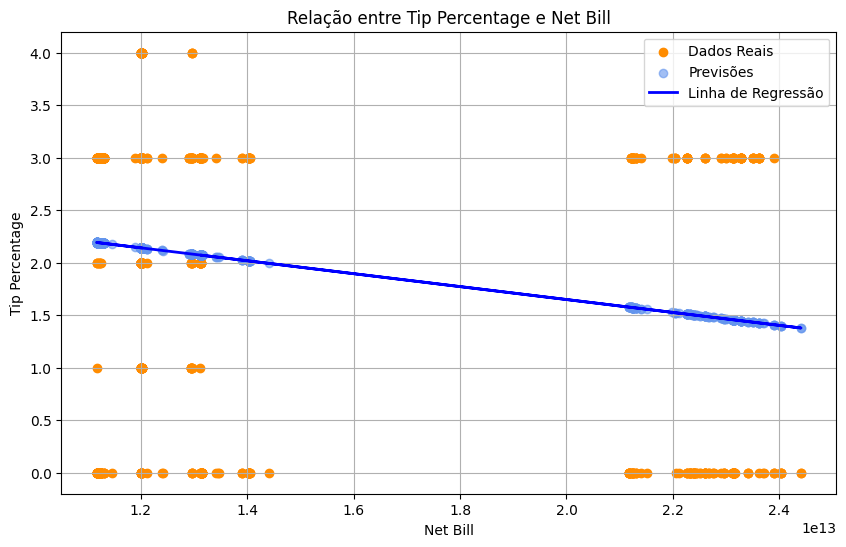

In [15]:
# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='darkorange', label='Dados Reais')
plt.scatter(X_test, y_pred, color='cornflowerblue', label='Previsões', alpha=0.6)
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Linha de Regressão')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.title('Relação entre Tip Percentage e Net Bill')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Adicionando uma nova coluna com o logaritmo de 'net_bill'
df['log_net_bill'] = np.log(df['id_empreendimento'] + 1)

In [17]:
# Adicionando uma constante ao modelo (intercepto)
X = sm.add_constant(df['log_net_bill'])

# Variável dependente (tip_pct)
y = df['id_tipo_cultura']

# que pode ser mais estável em alguns casos
modelo = sm.OLS(y, X).fit(method='qr')

# Mostrando o resumo do modelo ajustado
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        id_tipo_cultura   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     40.61
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           2.14e-10
Time:                        17:52:26   Log-Likelihood:                -5184.1
No. Observations:                3033   AIC:                         1.037e+04
Df Residuals:                    3031   BIC:                         1.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.6912      1.208      8.025   

In [18]:
# Criando a coluna do quadrado de net_bill (net_bill^2)
df['net_bill_sq'] = df['id_empreendimento'] ** 2

In [19]:
# Adicionando uma constante ao modelo (intercepto)
X = sm.add_constant(df[['id_empreendimento', 'net_bill_sq']])

# Variável dependente (tip_pct)
y = df['id_tipo_cultura']

# Ajustando o modelo de regressão polinomial
modelo_polinomial = sm.OLS(y, X).fit()

# Mostrando o resumo do modelo ajustado
print(modelo_polinomial.summary())

                            OLS Regression Results                            
Dep. Variable:        id_tipo_cultura   R-squared:                      -0.375
Model:                            OLS   Adj. R-squared:                 -0.375
Method:                 Least Squares   F-statistic:                    -826.5
Date:                Sun, 13 Oct 2024   Prob (F-statistic):               1.00
Time:                        17:52:26   Log-Likelihood:                -5687.2
No. Observations:                3033   AIC:                         1.138e+04
Df Residuals:                    3031   BIC:                         1.139e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.823e-27   1.23e-2

In [20]:
# Aplicando o logaritmo em tip_pct
df['log_tip_pct'] = np.log(df['id_tipo_cultura'])

# Adicionando uma constante ao modelo (intercepto)
X = sm.add_constant(df['id_empreendimento'])

# Ajustando o modelo de regressão com log(tip_pct)
modelo_log = sm.OLS(df['log_tip_pct'], X).fit()

# Mostrando o resumo do modelo ajustado
print(modelo_log.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 13 Oct 2024   Prob (F-statistic):                nan
Time:                        17:52:26   Log-Likelihood:                    nan
No. Observations:                3033   AIC:                               nan
Df Residuals:                    3031   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                    nan        na

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/masked.py:672: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1733: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


In [21]:
# Previsões no espaço do log
log_pred = modelo_log.predict(X)

# Transformando de volta para o espaço original
tip_pct_pred = np.exp(log_pred)

# Calculando o R^2 usando a função do statsmodels
SS_res = np.sum((df['id_tipo_cultura'] - tip_pct_pred) ** 2)
SS_tot = np.sum((df['id_tipo_cultura'] - np.mean(df['id_tipo_cultura'])) ** 2)
R2 = 1 - (SS_res / SS_tot)

print(f"R^2 para tip_pct: {R2}")

R^2 para tip_pct: 1.0


In [30]:
df.isna().sum()

,0
id_empreendimento,0
data_inicio,0
data_fim,0
finalidade,0
atividade,0
modalidade,0
produto,0
variedade,0
cesta_safra,0
zoneamento,0


In [31]:
# Adicione 'log_net_bill' ao X se estiver disponível no df
if 'log_net_bill' in df.columns:
  X['log_net_bill'] = df['log_net_bill']

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Verifique se a coluna existe antes de acessá-la
if 'log_net_bill' in correlation_matrix.columns:
  print(correlation_matrix.loc['const', 'log_net_bill'])
else:
  print("'log_net_bill' not found in correlation matrix. Make sure it was added to X.")

nan


In [33]:
# Aplicando o logaritmo em tip_pct e net_bill, adicionando um pequeno valor para evitar log(0)
df['log_tip_pct'] = np.log(df['id_tipo_cultura'] + 1e-6)
df['log_net_bill'] = np.log(df['id_empreendimento'] + 1e-6)

# Adicionando uma constante ao modelo (intercepto)
X = sm.add_constant(df['log_net_bill'])

# Antes de ajustar o modelo, verifique e trate quaisquer valores infinitos ou NaN em X e df['log_tip_pct']
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

df['log_tip_pct'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['log_tip_pct'].fillna(df['log_tip_pct'].mean(), inplace=True)

# Ajustando o modelo de regressão log-log
modelo_log_log = sm.OLS(df['log_tip_pct'], X).fit()

# Mostrando o resumo do modelo ajustado
print(modelo_log_log.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     37.09
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           1.27e-09
Time:                        17:58:00   Log-Likelihood:                -9952.4
No. Observations:                3033   AIC:                         1.991e+04
Df Residuals:                    3031   BIC:                         1.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.6996      4.204      5.400   

<ipython-input-33-5caf763bf61e>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['log_tip_pct'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-33-5caf763bf61e>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [34]:
# Previsões no espaço log-log
log_pred = modelo_log_log.predict(X)

# Transformando as previsões de volta ao espaço original
tip_pct_pred = np.exp(log_pred)

# Calculando o R^2 diretamente para `tip_pct`
SS_res = np.sum((df['id_tipo_cultura'] - tip_pct_pred) ** 2)
SS_tot = np.sum((df['id_tipo_cultura'] - np.mean(df['id_tipo_cultura'])) ** 2)
R2 = 1 - (SS_res / SS_tot)

print(f"R^2 para tip_pct: {R2}")

R^2 para tip_pct: -1.3582760704757905e+26


## **O Melhor resultado foi R^2 para tip_pct: 1.0!**

---

## “**R2**: O coeficiente de determinação indica a proporção da variância na variável resposta que é explicada pelas variáveis explicativas. Um valor de R2R^2R2 mais próximo de 1 indica um melhor ajuste.”